In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

In [ ]:
#Прочитаем и удалим столбец "Unnamed: 0"
X_bp = pd.read_excel('/content/X_bp.xlsx', index_col=0)
X_bp.shape

(1023, 10)

In [ ]:
#Посмотрим датасет
X_bp

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [ ]:
#Прочитаем и удалим столбец "Unnamed: 0"
X_nup = pd.read_excel('/content/X_nup.xlsx', index_col=0)
X_nup.shape

(1040, 3)

In [ ]:
#Посмотрим датасет
X_nup

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,4.000000,57.000000
1,0,4.000000,60.000000
2,0,4.000000,70.000000
3,0,5.000000,47.000000
4,0,5.000000,57.000000
...,...,...,...
1035,90,8.088111,47.759177
1036,90,7.619138,66.931932
1037,90,9.800926,72.858286
1038,90,10.079859,65.519479


In [ ]:
#Переименуем столбец на английский, чтоб весь код работал и в Avto ML
X_bp = X_bp.rename(columns={'Соотношение матрица-наполнитель' : 'Matrix_filler_ratio'})
X_bp = X_bp.rename(columns={'Прочность при растяжении, МПа' : 'Tensile_strength'})
X_bp = X_bp.rename(columns={'Плотность, кг/м3' : 'Density'})
X_bp = X_bp.rename(columns={'модуль упругости, ГПа' : 'Tensile_modulus'})
X_bp = X_bp.rename(columns={'Количество отвердителя, м.%' : 'Quantity_of_hardener'})
X_bp = X_bp.rename(columns={'Содержание эпоксидных групп,%_2' : 'Epoxy_groups'})
X_bp = X_bp.rename(columns={'Температура вспышки, С_2' : 'Flash_temperature'})
X_bp = X_bp.rename(columns={'Поверхностная плотность, г/м2' : 'Surface_density'})
X_bp = X_bp.rename(columns={'Модуль упругости при растяжении, ГПа' : 'Tensile_modulus_strength'})
X_bp = X_bp.rename(columns={'Потребление смолы, г/м2' : 'Resin_consumption'})
X_bp

,Matrix_filler_ratio,Density,Tensile_modulus,Quantity_of_hardener,Epoxy_groups,Flash_temperature,Surface_density,Tensile_modulus_strength,Tensile_strength,Resin_consumption
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [ ]:
#Переименуем столбец на английский, чтоб весь код работал и в Avto ML
X_nup = X_nup.rename(columns={'Угол нашивки, град' : 'Corner_Stripe'})
X_nup = X_nup.rename(columns={'Шаг нашивки' : 'Step_Stripe'})
X_nup = X_nup.rename(columns={'Плотность нашивки' : 'Density_stripe'})
X_nup

,Corner_Stripe,Step_Stripe,Density_stripe
0,0,4.000000,57.000000
1,0,4.000000,60.000000
2,0,4.000000,70.000000
3,0,5.000000,47.000000
4,0,5.000000,57.000000
...,...,...,...
1035,90,8.088111,47.759177
1036,90,7.619138,66.931932
1037,90,9.800926,72.858286
1038,90,10.079859,65.519479


In [ ]:
#Объединим датасеты
X_bp_nup = pd.concat([X_bp, X_nup], axis=1, join='inner')

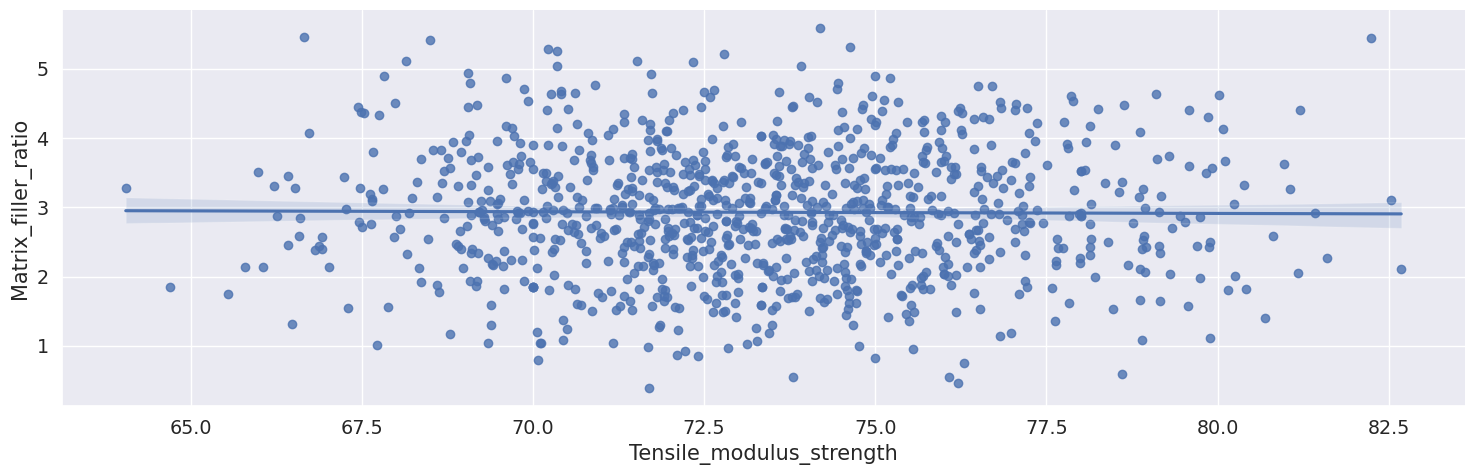

In [ ]:
#Посмотрим зависимость
sns.lmplot(data=X_bp_nup, x ='Tensile_modulus_strength', y = 'Matrix_filler_ratio', aspect=3, height=5)
plt.show()

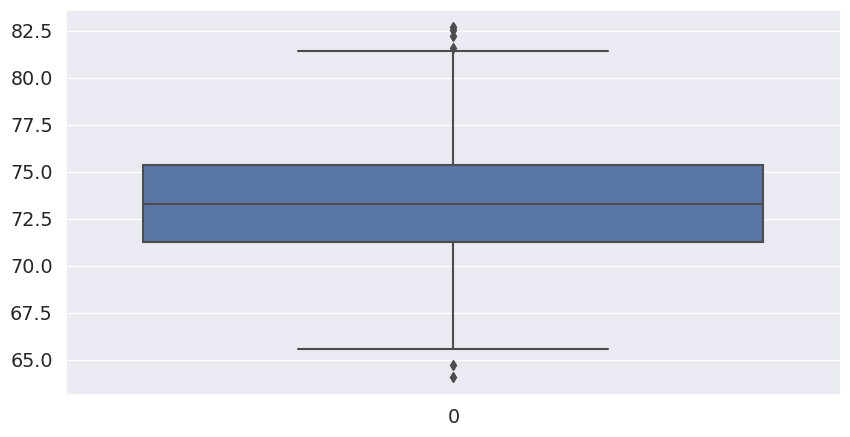

In [ ]:
#Такой вид диаграммы в удобной форме показывает медиану, нижний и верхний квантили, минимальное и максимальное значение выборки и выбросы.
plt.figure(figsize=(10,5))
sns.boxplot(X_bp_nup.Tensile_modulus_strength)
plt.show()

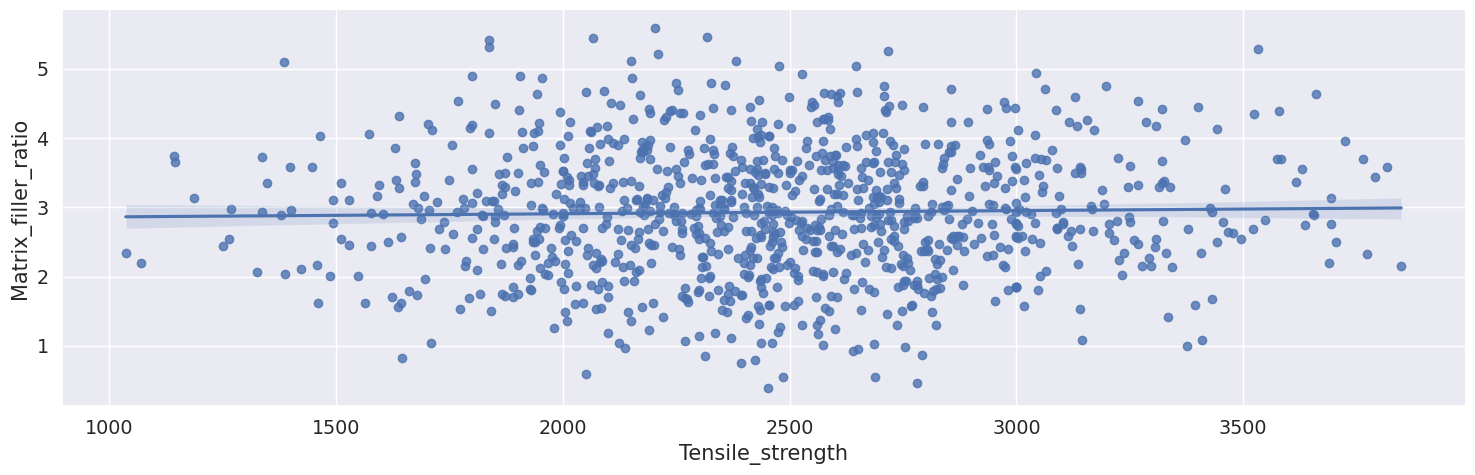

In [ ]:
#Посмотрим зависимость
sns.lmplot(data=X_bp_nup, x ='Tensile_strength', y = 'Matrix_filler_ratio', aspect=3, height=5)
plt.show()

In [ ]:
#Разделим на группы с шагом 10%
Tensmod_bins = X_bp_nup.Tensile_modulus_strength.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
Tensmod_bins

0.0    64.054061
0.1    69.349734
0.2    70.597252
0.3    71.697879
0.4    72.449592
0.5    73.268805
0.6    74.071474
0.7    74.877803
0.8    75.965243
0.9    77.320329
1.0    82.682051
Name: Tensile_modulus_strength, dtype: float64

In [ ]:
#Разделим на группы с шагом 10%
Tensstr_bins = X_bp_nup.Tensile_strength.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
Tensstr_bins

0.0    1036.856605
0.1    1859.926442
0.2    2055.624091
0.3    2203.637339
0.4    2354.805993
0.5    2459.524526
0.6    2578.843678
0.7    2707.683889
0.8    2852.039101
0.9    3088.769063
1.0    3848.436732
Name: Tensile_strength, dtype: float64

In [ ]:
#Визуализацию подготовим
X_bp_nup['Group_Tensile_strength'] = pd.cut(X_bp_nup.Tensile_strength, Tensstr_bins, 
                                  labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
                                   right=True, include_lowest=True)

In [ ]:
#Визуализацию подготовим
X_bp_nup['Group_Tensile_modulus_strength'] = pd.cut(X_bp_nup.Tensile_modulus_strength, Tensmod_bins, 
                                  labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
                                   right=True, include_lowest=True)

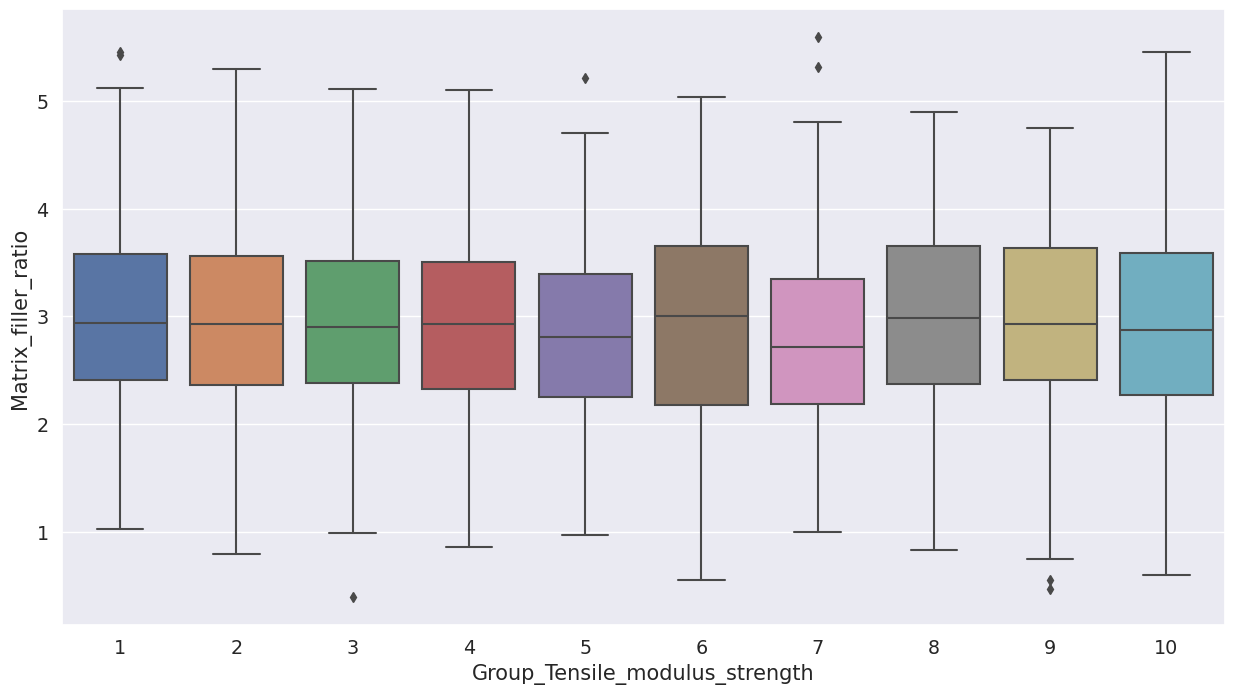

In [ ]:
#Визуализируем разбиение
plt.figure(figsize=(15,8))
sns.boxplot(data = X_bp_nup, y = 'Matrix_filler_ratio', x = 'Group_Tensile_modulus_strength') 
            #,hue='Group_Tensile_modulus_strength')
plt.show()

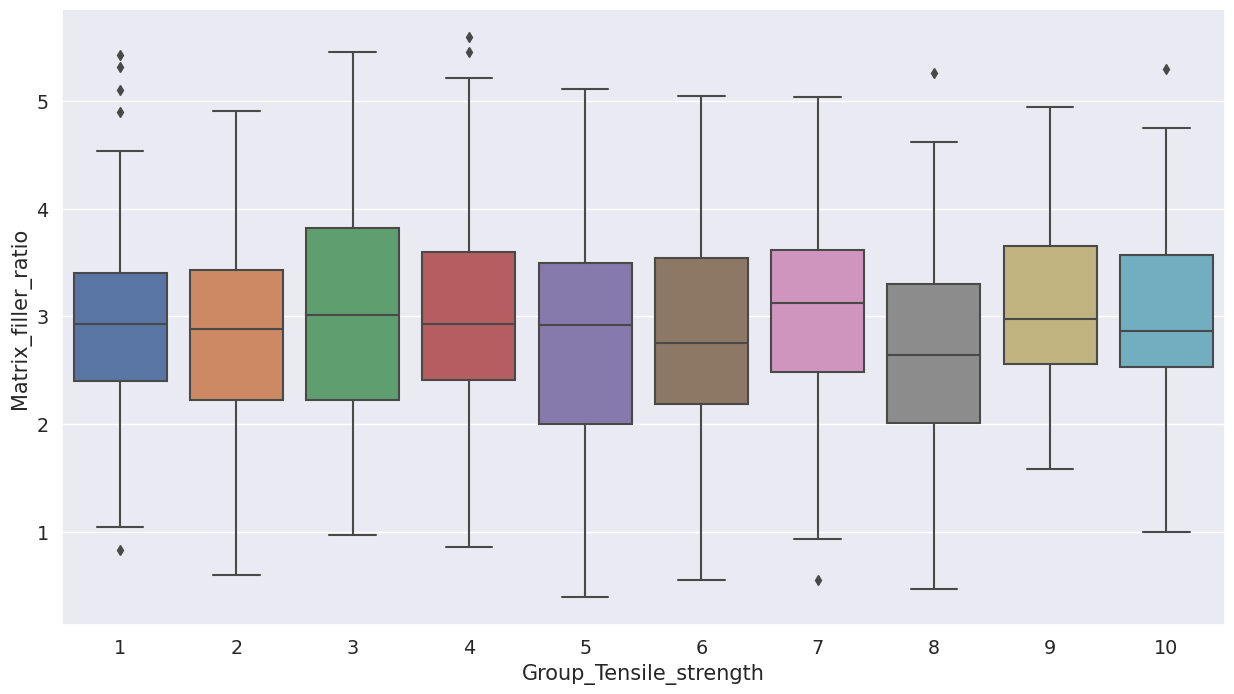

In [ ]:
#Визуализируем разбиение
plt.figure(figsize=(15,8))
sns.boxplot(data = X_bp_nup, y = 'Matrix_filler_ratio', x = 'Group_Tensile_strength') 
            #,hue='Group_Tensile_modulus_strength')
plt.show()

<ipython-input-88-178f26857a78>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_bp['Tensile_modulus_strength'], label='Tensile_modulus_strength')


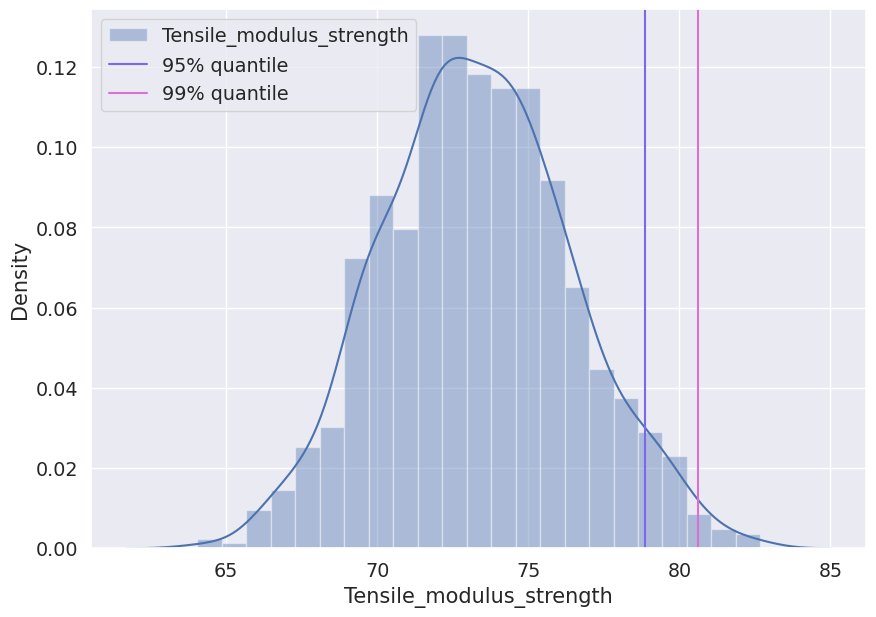

In [ ]:
plt.subplots(figsize=(10,7))
sns.distplot(X_bp['Tensile_modulus_strength'], label='Tensile_modulus_strength')
plt.axvline(X_bp.Tensile_modulus_strength.quantile(0.95), label='95% quantile', c='mediumslateblue')
plt.axvline(X_bp.Tensile_modulus_strength.quantile(0.99), label='99% quantile', c='orchid')
plt.legend()
plt.show() 

In [ ]:
# "95-й квантиль равен 78.872139" - т.е. Tensile_modulus_strength не превыает 78.872139 в 95% случаев

X_bp_nup['Tensile_modulus_strength'].quantile(0.05), X_bp_nup['Tensile_modulus_strength'].quantile(0.95)

(68.37767912545496, 78.87213912303336)

In [ ]:
# В 90% случаев значение находится в диапазоне от <68.377679> до <78.872139> 
X_bp_nup['Tensile_modulus_strength'].hist()
plt.axvline(x=X_bp_nup['Tensile_modulus_strength'].quantile(0.05), color='red')
plt.axvline(x=X_bp_nup['Tensile_modulus_strength'].quantile(0.95), color='red')

<ipython-input-93-928cfde54826>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_bp['Tensile_strength'], label='Tensile_strength')


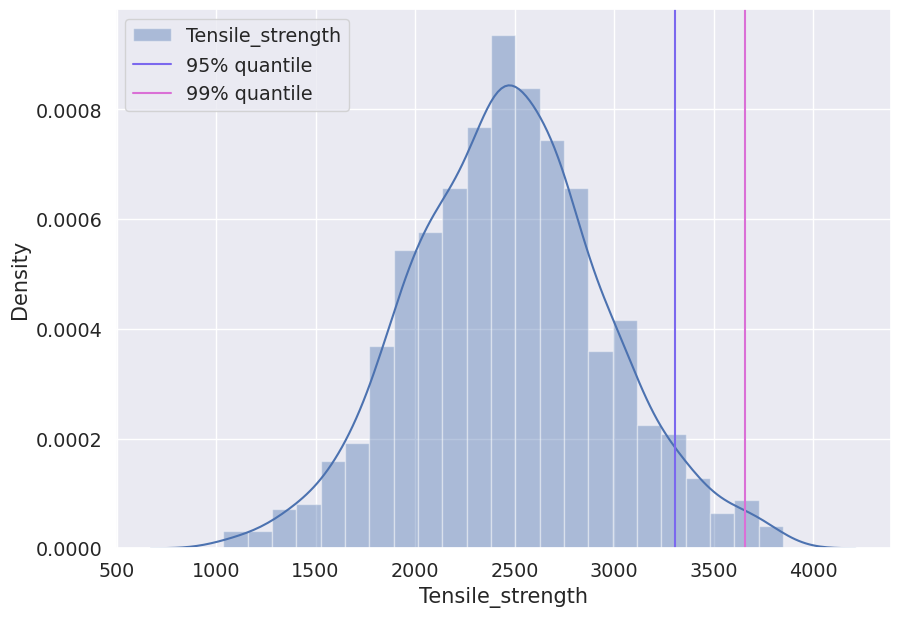

In [ ]:
plt.subplots(figsize=(10,7))
sns.distplot(X_bp['Tensile_strength'], label='Tensile_strength')
plt.axvline(X_bp.Tensile_strength.quantile(0.95), label='95% quantile', c='mediumslateblue')
plt.axvline(X_bp.Tensile_strength.quantile(0.99), label='99% quantile', c='orchid')
plt.legend()
plt.show()

<ipython-input-95-e12606cbf57a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_bp['Matrix_filler_ratio'], label='Matrix_filler_ratio')


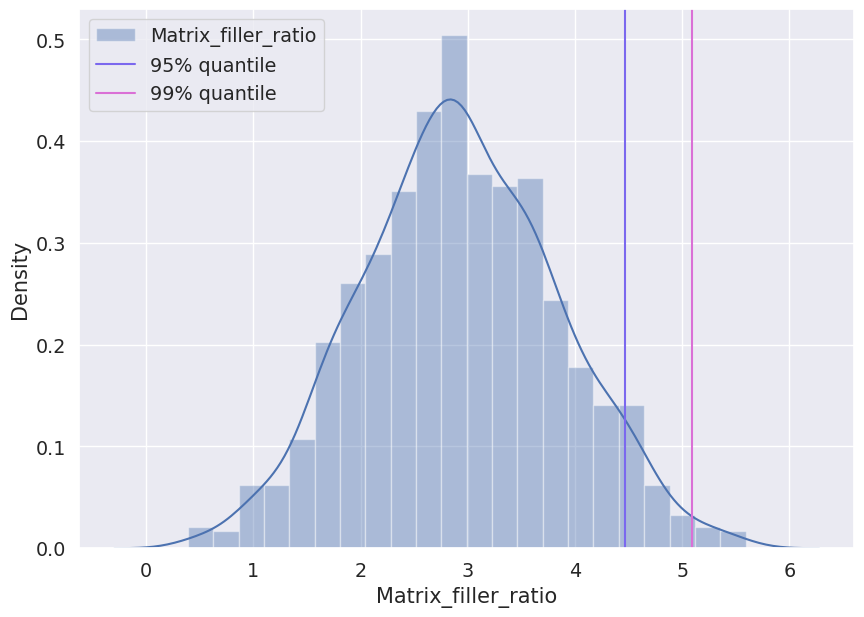

In [ ]:
plt.subplots(figsize=(10,7))
sns.distplot(X_bp['Matrix_filler_ratio'], label='Matrix_filler_ratio')
plt.axvline(X_bp.Matrix_filler_ratio.quantile(0.95), label='95% quantile', c='mediumslateblue')
plt.axvline(X_bp.Matrix_filler_ratio.quantile(0.99), label='99% quantile', c='orchid')
plt.legend()
plt.show()

In [ ]:
#Интересно: видим рост после 99% квантиля
plt.subplots(figsize=(10,7))
sns.distplot(X_bp['Quantity_of_hardener'], label='Quantity_of_hardener')
plt.axvline(X_bp.Quantity_of_hardener.quantile(0.95), label='95% quantile', c='mediumslateblue')
plt.axvline(X_bp.Quantity_of_hardener.quantile(0.99), label='99% quantile', c='orchid')
plt.legend()
plt.show()

In [ ]:
#Интересно: видим более сильный рост после 99% квантиля
plt.subplots(figsize=(10,7))
sns.distplot(X_bp['Epoxy_groups'], label='Epoxy_groups')
plt.axvline(X_bp.Epoxy_groups.quantile(0.95), label='95% quantile', c='mediumslateblue')
plt.axvline(X_bp.Epoxy_groups.quantile(0.99), label='99% quantile', c='orchid')
plt.legend()
plt.show()

In [ ]:
#Топ 4 положительных корреляций
k = 4
corrmat = X_bp_nup.corr()
cols = corrmat.nlargest(k, 'Matrix_filler_ratio')['Matrix_filler_ratio'].index
cols

Index(['Matrix_filler_ratio', 'Resin_consumption', 'Step_Stripe',
       'Tensile_modulus'],
      dtype='object')

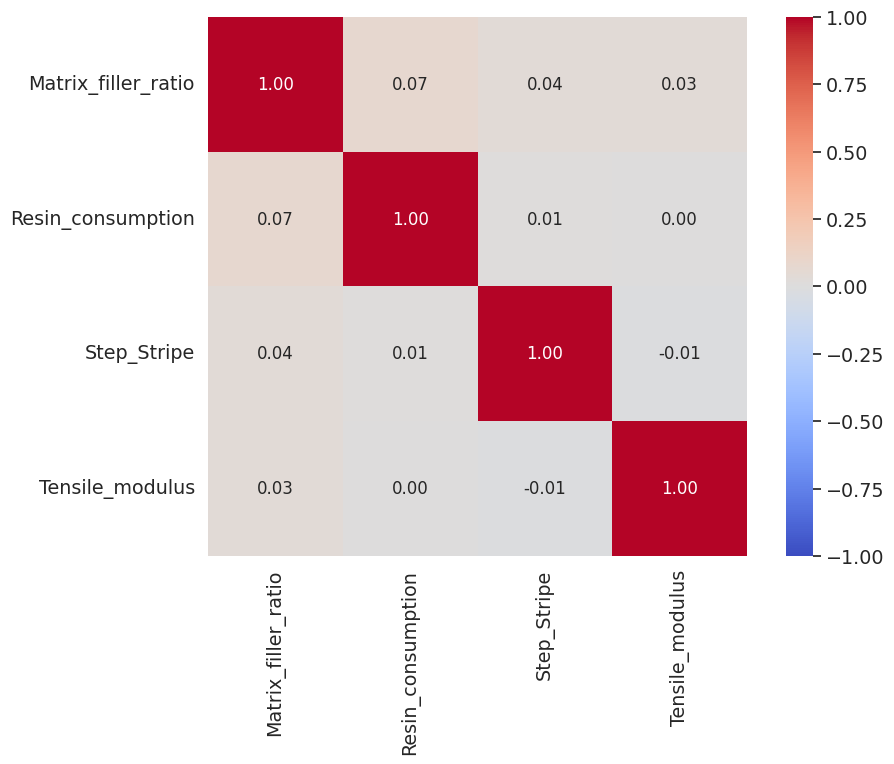

In [ ]:
#Визуализируем Топ 4 положительных корреляций
cm = np.corrcoef(X_bp_nup[cols].values.T)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12},\
                yticklabels=cols, xticklabels=cols, vmin=-1, center=0,\
                    cmap=sns.color_palette('coolwarm',1000))
plt.show()

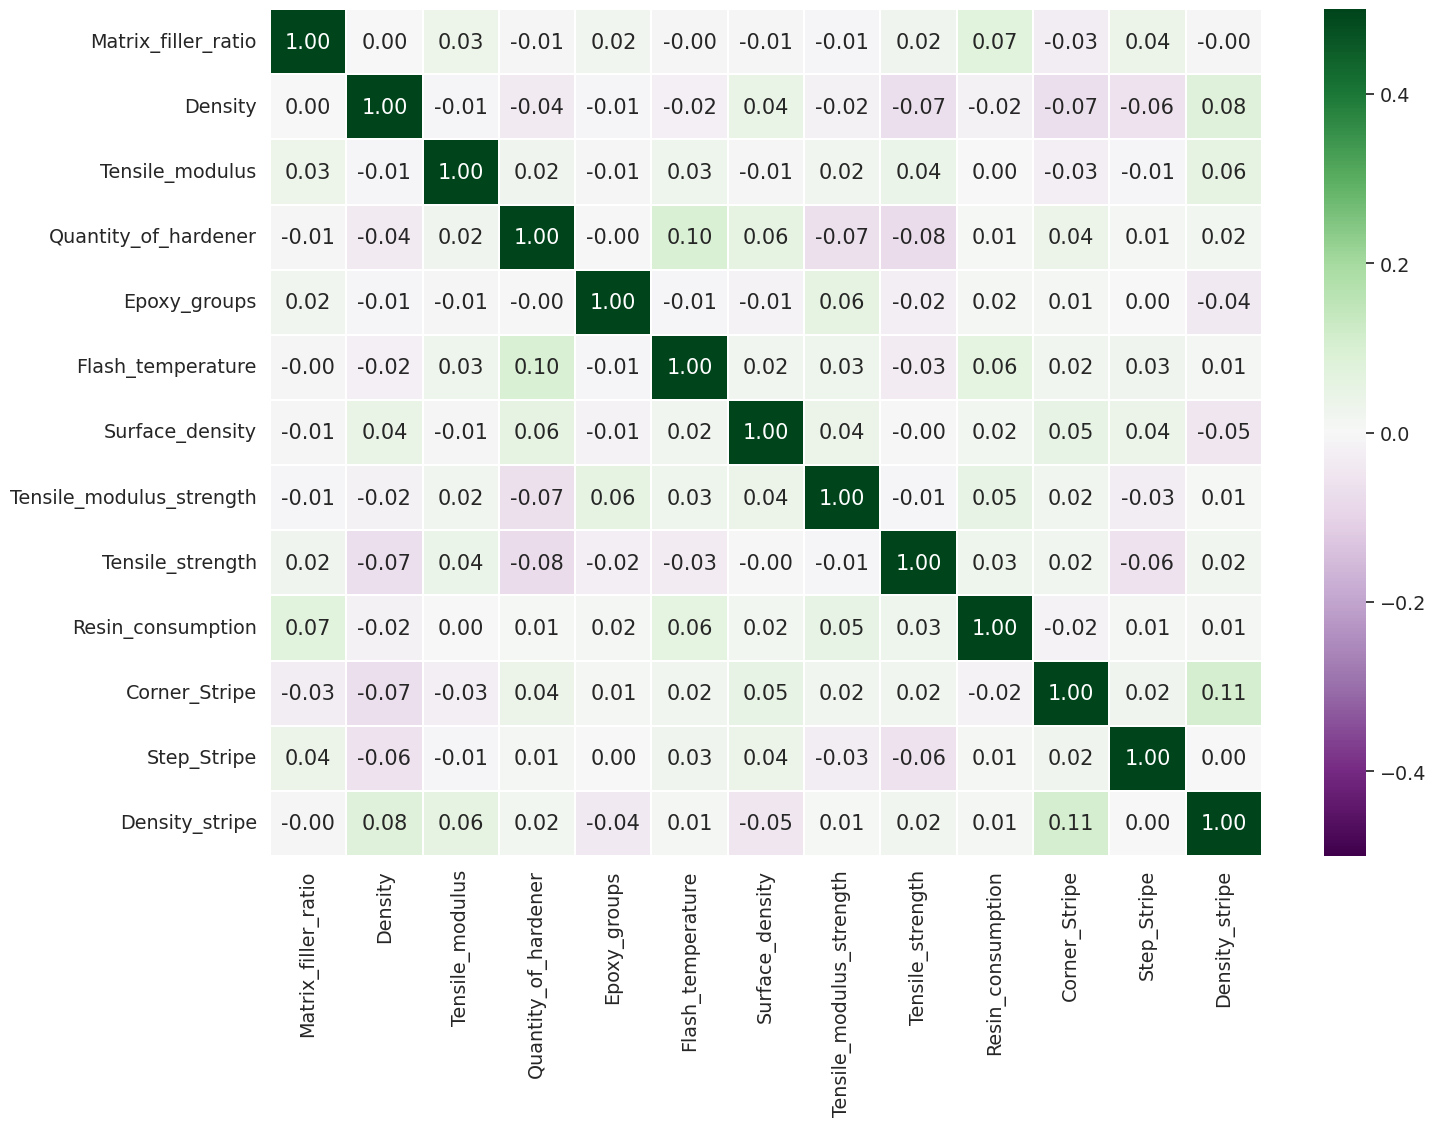

In [ ]:
#Корреляция для полного датасета
def get_corr(X_bp_nup):
  corr = X_bp_nup.corr()
  fig, ax = plt.subplots(figsize=(16, 11))
  sns.heatmap(corr, vmin=-0.5, vmax=0.5, annot=True, fmt='.2f',cmap='PRGn', ax=ax, linewidths = 0.1)
  plt.show()
get_corr(X_bp_nup)

In [ ]:
# 25 largest values in column Tensile_strength
X_bp_nup.nlargest(25, ['Tensile_strength'])

,Matrix_filler_ratio,Density,Tensile_modulus,Quantity_of_hardener,Epoxy_groups,Flash_temperature,Surface_density,Tensile_modulus_strength,Tensile_strength,Resin_consumption,Corner_Stripe,Step_Stripe,Density_stripe,Group_Tensile_strength,Group_Tensile_modulus_strength
185,2.152055,1938.282144,1065.625743,148.104233,19.093392,234.856713,865.629036,72.299462,3848.436732,143.123640,0,5.783165,36.911051,10,4
387,3.578323,1988.596676,948.981345,135.707494,22.012106,221.204295,609.350655,71.801782,3817.269484,344.718381,0,6.650891,62.726164,10,4
172,3.441706,1839.864649,935.511792,99.079859,20.715839,330.371637,556.153263,76.632138,3791.072810,284.852950,0,7.208147,35.768811,10,9
106,2.334566,2020.976475,1013.513596,109.505135,24.330905,266.258622,719.870002,68.166534,3773.151949,264.835584,0,7.363599,69.172337,10,1
695,3.694073,2052.863693,607.307517,109.654355,17.638147,267.369398,322.090391,71.446958,3763.445179,110.801517,90,3.656530,49.994798,10,3
99,3.952834,1931.687894,348.354645,108.403571,22.951690,208.041941,97.545358,71.807955,3725.190760,134.392555,0,4.402248,48.959084,10,4
24,2.499918,1942.595777,901.519947,146.252208,23.081757,351.231874,864.725484,76.178075,3705.672523,226.222760,90,5.000000,47.000000,10,9
654,2.765952,1962.815063,450.162904,96.774928,24.017798,321.824505,105.594833,73.196463,3694.298044,224.098213,90,3.636983,61.322980,10,5
897,3.134922,1952.477882,875.447875,41.429139,22.458023,288.312124,155.638229,72.686248,3693.676531,90.546147,90,5.838643,73.345329,10,5
1008,2.199958,2035.926322,1432.754588,79.491398,18.888497,277.001756,394.155471,73.268805,3689.223681,345.065258,90,6.891764,50.209749,10,5


In [ ]:
# 25 largest values in column Tensile_strength
top_mod_T25 = X_bp_nup.nlargest(25, ['Tensile_strength'])
top_mod_T25

,Matrix_filler_ratio,Density,Tensile_modulus,Quantity_of_hardener,Epoxy_groups,Flash_temperature,Surface_density,Tensile_modulus_strength,Tensile_strength,Resin_consumption,Corner_Stripe,Step_Stripe,Density_stripe,Group_Tensile_strength,Group_Tensile_modulus_strength
185,2.152055,1938.282144,1065.625743,148.104233,19.093392,234.856713,865.629036,72.299462,3848.436732,143.123640,0,5.783165,36.911051,10,4
387,3.578323,1988.596676,948.981345,135.707494,22.012106,221.204295,609.350655,71.801782,3817.269484,344.718381,0,6.650891,62.726164,10,4
172,3.441706,1839.864649,935.511792,99.079859,20.715839,330.371637,556.153263,76.632138,3791.072810,284.852950,0,7.208147,35.768811,10,9
106,2.334566,2020.976475,1013.513596,109.505135,24.330905,266.258622,719.870002,68.166534,3773.151949,264.835584,0,7.363599,69.172337,10,1
695,3.694073,2052.863693,607.307517,109.654355,17.638147,267.369398,322.090391,71.446958,3763.445179,110.801517,90,3.656530,49.994798,10,3
99,3.952834,1931.687894,348.354645,108.403571,22.951690,208.041941,97.545358,71.807955,3725.190760,134.392555,0,4.402248,48.959084,10,4
24,2.499918,1942.595777,901.519947,146.252208,23.081757,351.231874,864.725484,76.178075,3705.672523,226.222760,90,5.000000,47.000000,10,9
654,2.765952,1962.815063,450.162904,96.774928,24.017798,321.824505,105.594833,73.196463,3694.298044,224.098213,90,3.636983,61.322980,10,5
897,3.134922,1952.477882,875.447875,41.429139,22.458023,288.312124,155.638229,72.686248,3693.676531,90.546147,90,5.838643,73.345329,10,5
1008,2.199958,2035.926322,1432.754588,79.491398,18.888497,277.001756,394.155471,73.268805,3689.223681,345.065258,90,6.891764,50.209749,10,5


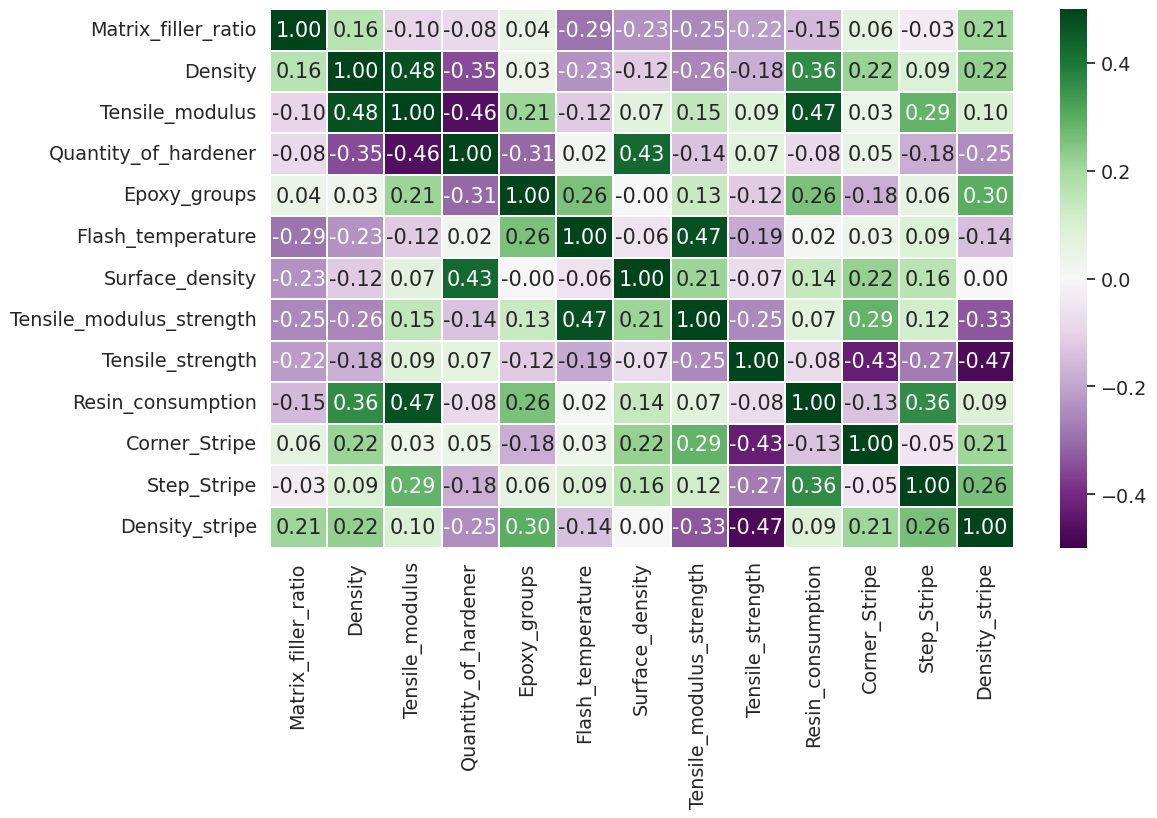

In [ ]:
#Корреляция для топ 25
def get_corr(top_mod_T25):
  corr = top_mod_T25.corr()
  fig, ax = plt.subplots(figsize=(12, 7))
  sns.heatmap(corr, vmin=-0.5, vmax=0.5, annot=True, fmt='.2f',cmap='PRGn', ax=ax, linewidths = 0.1)
  plt.show()
get_corr(top_mod_T25)

In [ ]:
#plt.subplots(figsize=(10,7))
#sns.distplot(top_mod_T25['Matrix_filler_ratio'], label='Matrix_filler_ratio')
#plt.axvline(top_mod_T25.Matrix_filler_ratio.quantile(0.95), label='95% quantile', c='mediumslateblue')
#plt.axvline(top_mod_T25.Matrix_filler_ratio.quantile(0.99), label='99% quantile', c='orchid')
#plt.legend()
#plt.show()

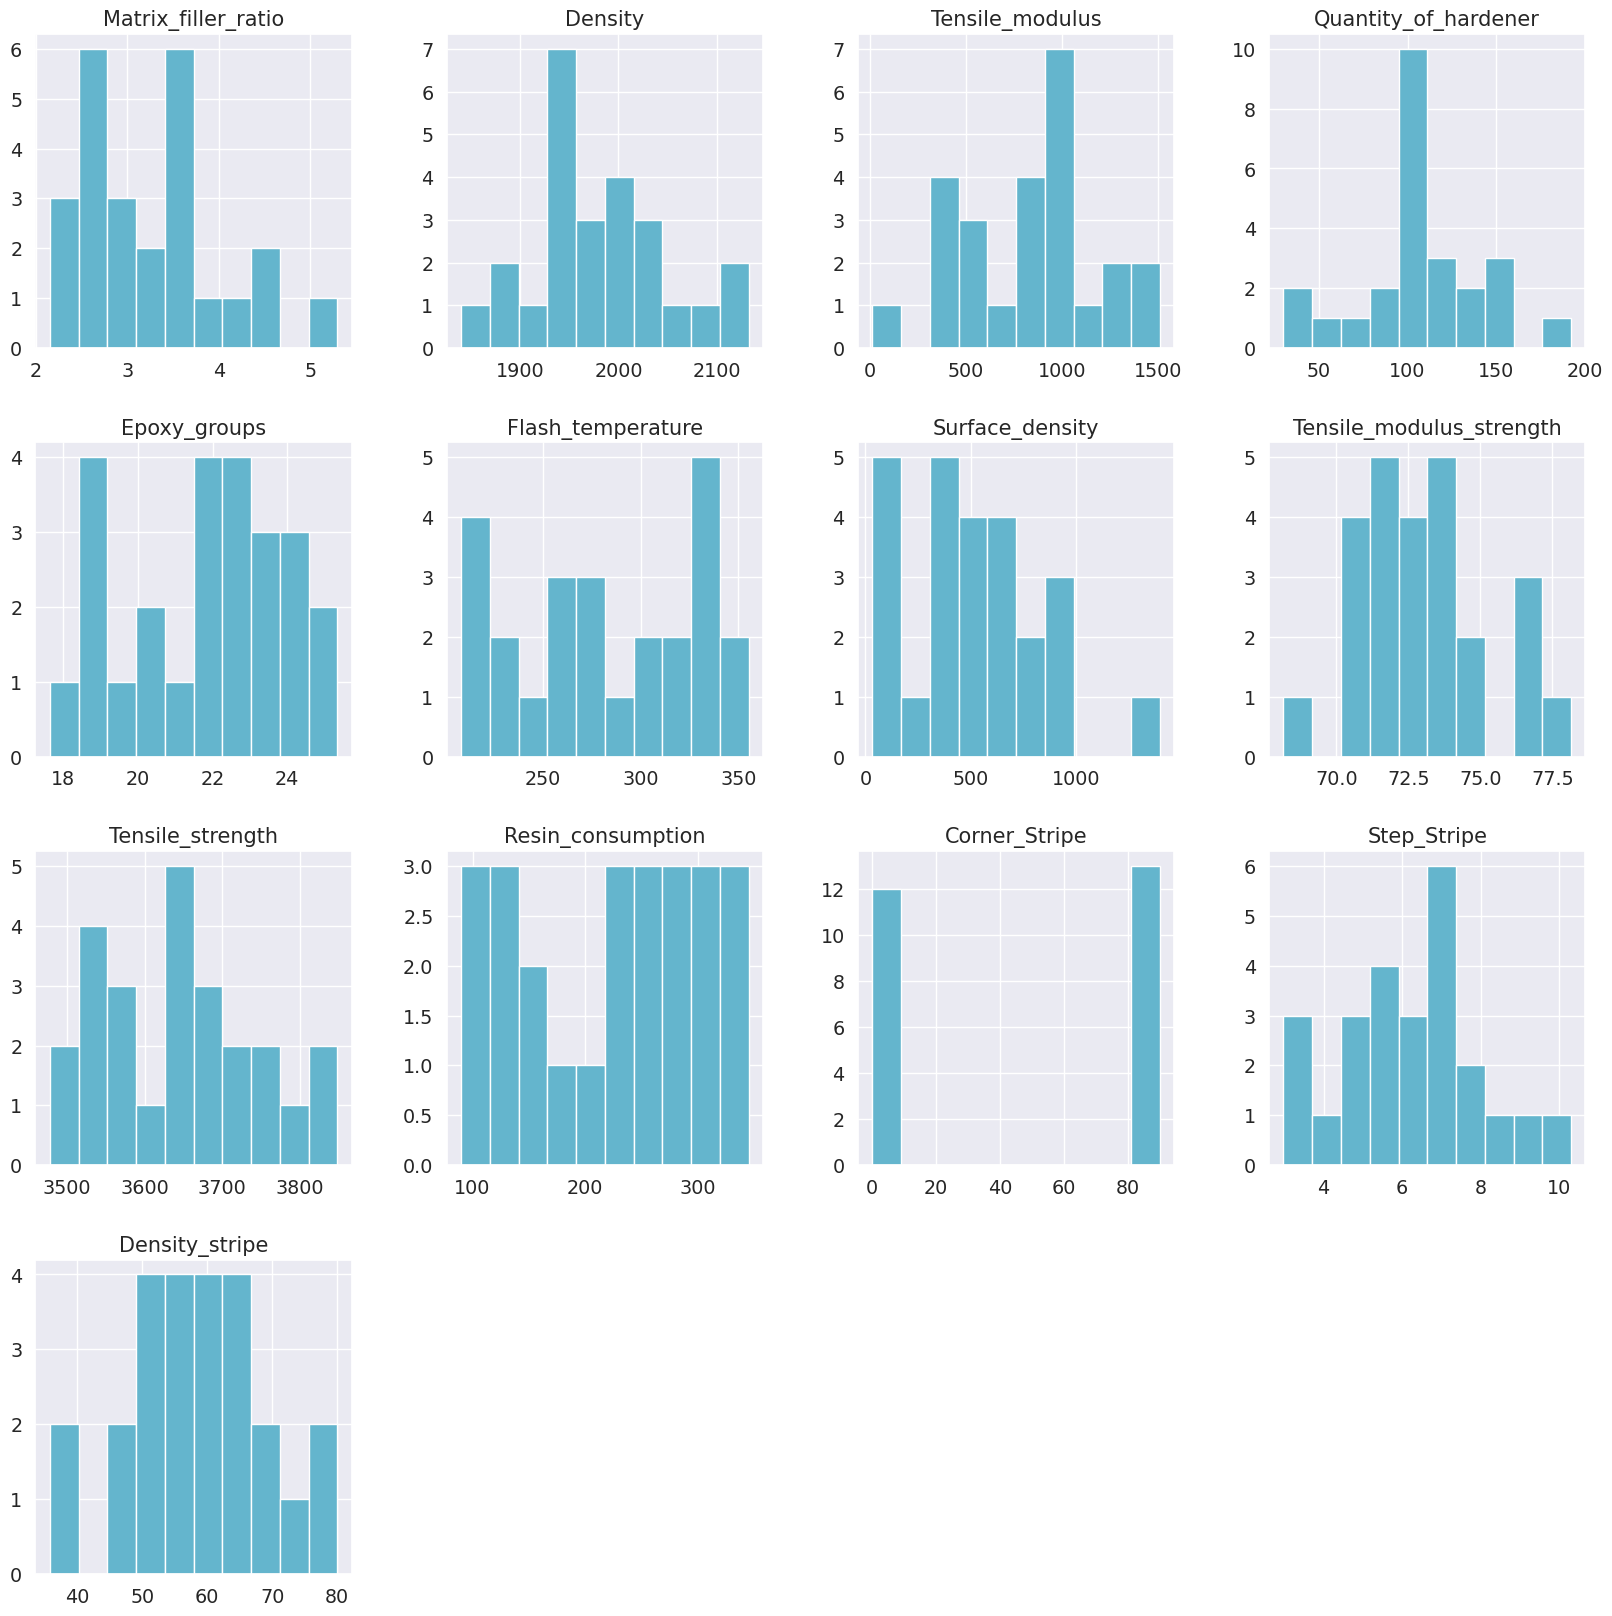

In [ ]:
#Гистограммы распределения для каждой переменнойв топ 24:
top_mod_T25.hist(figsize = (20,20), color = "c")
plt.show()

In [ ]:
# 25 largest values in column Tensile_modulus_strength
X_bp_nup.nlargest(25, ['Tensile_modulus_strength'])

,Matrix_filler_ratio,Density,Tensile_modulus,Quantity_of_hardener,Epoxy_groups,Flash_temperature,Surface_density,Tensile_modulus_strength,Tensile_strength,Resin_consumption,Corner_Stripe,Step_Stripe,Density_stripe,Group_Tensile_strength,Group_Tensile_modulus_strength
375,2.106888,1914.089369,963.748397,58.710809,23.813708,278.612240,793.402805,82.682051,1422.975753,283.239742,0,6.776888,49.697311,1,10
1000,3.109130,2019.939791,855.877168,125.654249,22.788022,323.766318,585.456532,82.525773,2715.953011,251.571333,90,4.212257,71.960542,8,10
505,5.452959,1918.688919,1016.975202,119.048341,23.461800,275.341538,41.129428,82.237600,2066.553692,278.510337,0,1.280057,50.323463,3,10
135,2.271032,1862.432065,1428.870308,125.557042,24.023624,317.571591,293.085220,81.594750,2419.520717,220.481828,0,0.310815,70.157259,5,10
706,2.921002,1935.790960,1027.545257,114.251686,20.919742,258.760946,358.878702,81.417126,1576.891309,152.083652,90,8.029074,59.298684,1,10
217,4.414416,1901.586009,1000.289288,98.244089,24.481028,288.401849,399.870134,81.203147,2371.299242,251.359279,0,2.511647,75.348275,5,10
221,2.051710,2161.565216,1012.659478,145.167640,24.603621,274.893657,837.480364,81.175231,2011.622551,176.817505,0,5.076483,70.979716,2,10
148,3.267523,2107.549113,712.148822,60.994261,27.312167,268.485007,121.565802,81.053293,3460.438212,340.016626,0,4.570892,78.547358,10,10
761,3.625686,2063.129132,1004.574573,89.075581,21.844375,247.156750,779.849453,80.970959,2331.536448,137.760968,90,7.409399,55.402947,4,10
23,2.587348,1953.274926,1136.596135,137.627420,22.344534,234.716883,555.893453,80.803222,2587.342983,246.613117,90,4.000000,70.000000,7,10


In [ ]:
# 25 largest values in column Tensile_modulus_strength
top_mod_M25 = X_bp_nup.nlargest(25, ['Tensile_modulus_strength'])
top_mod_M25

,Matrix_filler_ratio,Density,Tensile_modulus,Quantity_of_hardener,Epoxy_groups,Flash_temperature,Surface_density,Tensile_modulus_strength,Tensile_strength,Resin_consumption,Corner_Stripe,Step_Stripe,Density_stripe,Group_Tensile_strength,Group_Tensile_modulus_strength
375,2.106888,1914.089369,963.748397,58.710809,23.813708,278.612240,793.402805,82.682051,1422.975753,283.239742,0,6.776888,49.697311,1,10
1000,3.109130,2019.939791,855.877168,125.654249,22.788022,323.766318,585.456532,82.525773,2715.953011,251.571333,90,4.212257,71.960542,8,10
505,5.452959,1918.688919,1016.975202,119.048341,23.461800,275.341538,41.129428,82.237600,2066.553692,278.510337,0,1.280057,50.323463,3,10
135,2.271032,1862.432065,1428.870308,125.557042,24.023624,317.571591,293.085220,81.594750,2419.520717,220.481828,0,0.310815,70.157259,5,10
706,2.921002,1935.790960,1027.545257,114.251686,20.919742,258.760946,358.878702,81.417126,1576.891309,152.083652,90,8.029074,59.298684,1,10
217,4.414416,1901.586009,1000.289288,98.244089,24.481028,288.401849,399.870134,81.203147,2371.299242,251.359279,0,2.511647,75.348275,5,10
221,2.051710,2161.565216,1012.659478,145.167640,24.603621,274.893657,837.480364,81.175231,2011.622551,176.817505,0,5.076483,70.979716,2,10
148,3.267523,2107.549113,712.148822,60.994261,27.312167,268.485007,121.565802,81.053293,3460.438212,340.016626,0,4.570892,78.547358,10,10
761,3.625686,2063.129132,1004.574573,89.075581,21.844375,247.156750,779.849453,80.970959,2331.536448,137.760968,90,7.409399,55.402947,4,10
23,2.587348,1953.274926,1136.596135,137.627420,22.344534,234.716883,555.893453,80.803222,2587.342983,246.613117,90,4.000000,70.000000,7,10


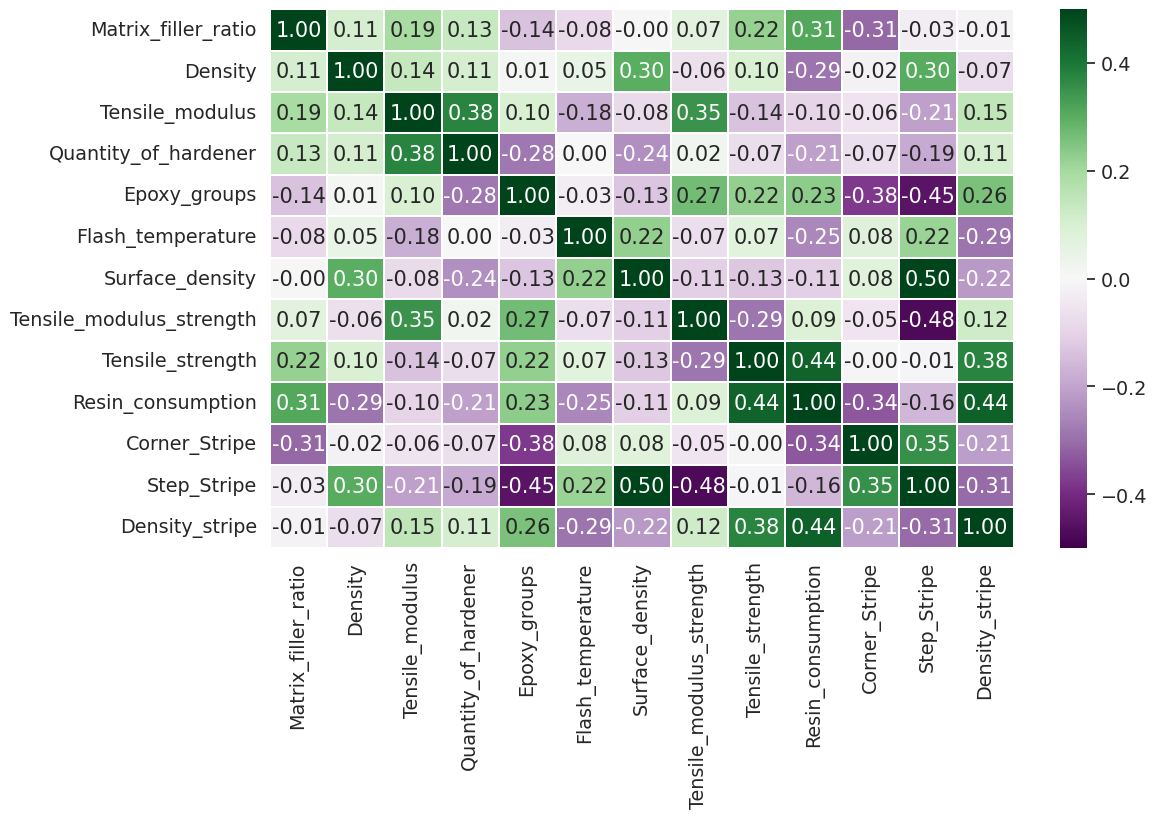

In [ ]:
#Корреляция для топ 25
def get_corr(top_mod_M25):
  corr = top_mod_M25.corr()
  fig, ax = plt.subplots(figsize=(12, 7))
  sns.heatmap(corr, vmin=-0.5, vmax=0.5, annot=True, fmt='.2f',cmap='PRGn', ax=ax, linewidths = 0.1)
  plt.show()
get_corr(top_mod_M25)

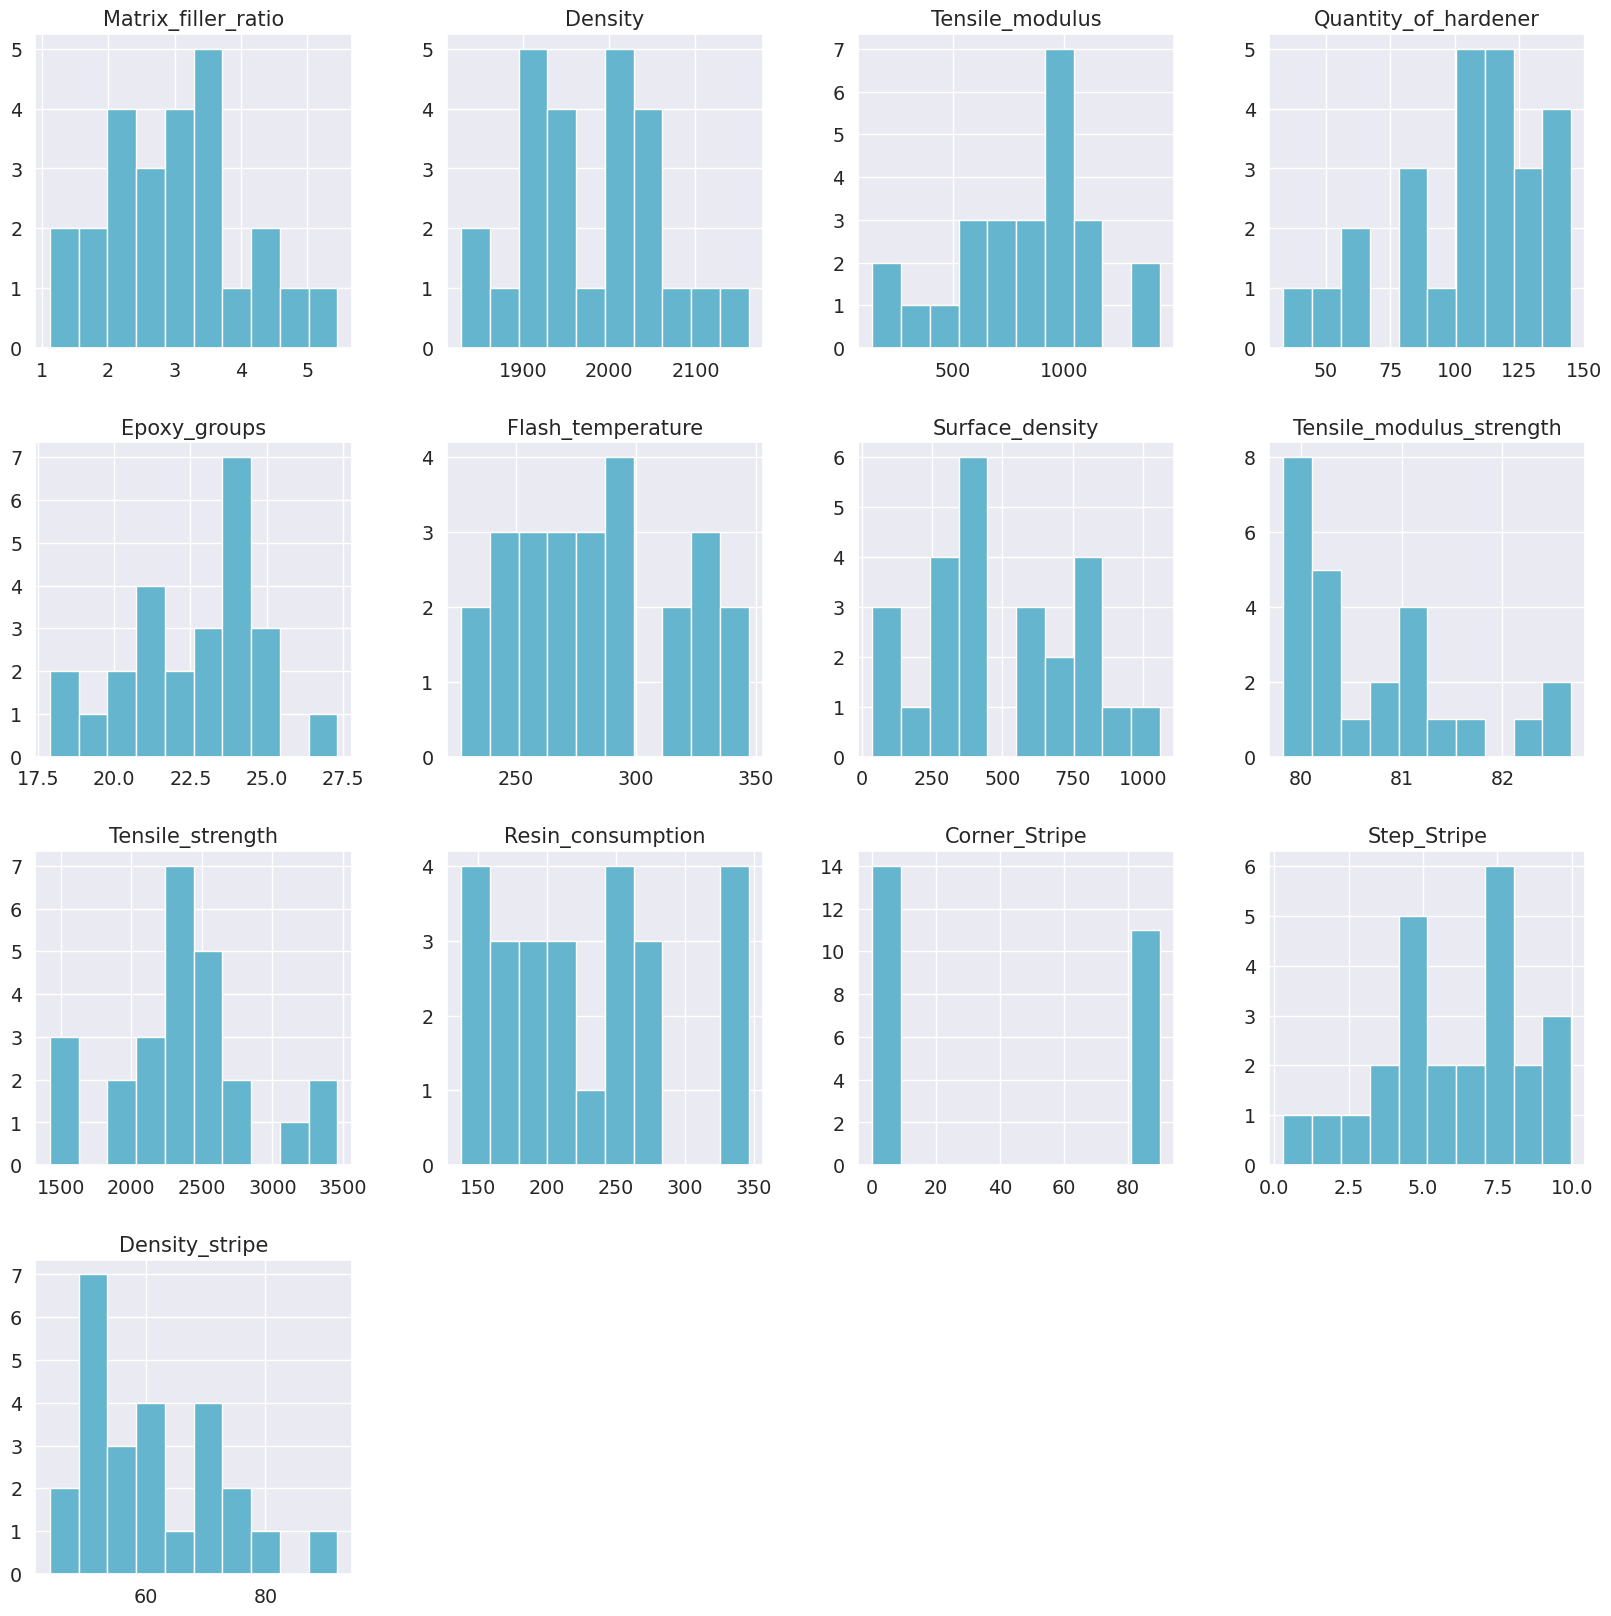

In [ ]:
#Гистограммы распределения для каждой переменной:
top_mod_M25.hist(figsize = (20,20), color = "c")
plt.show()

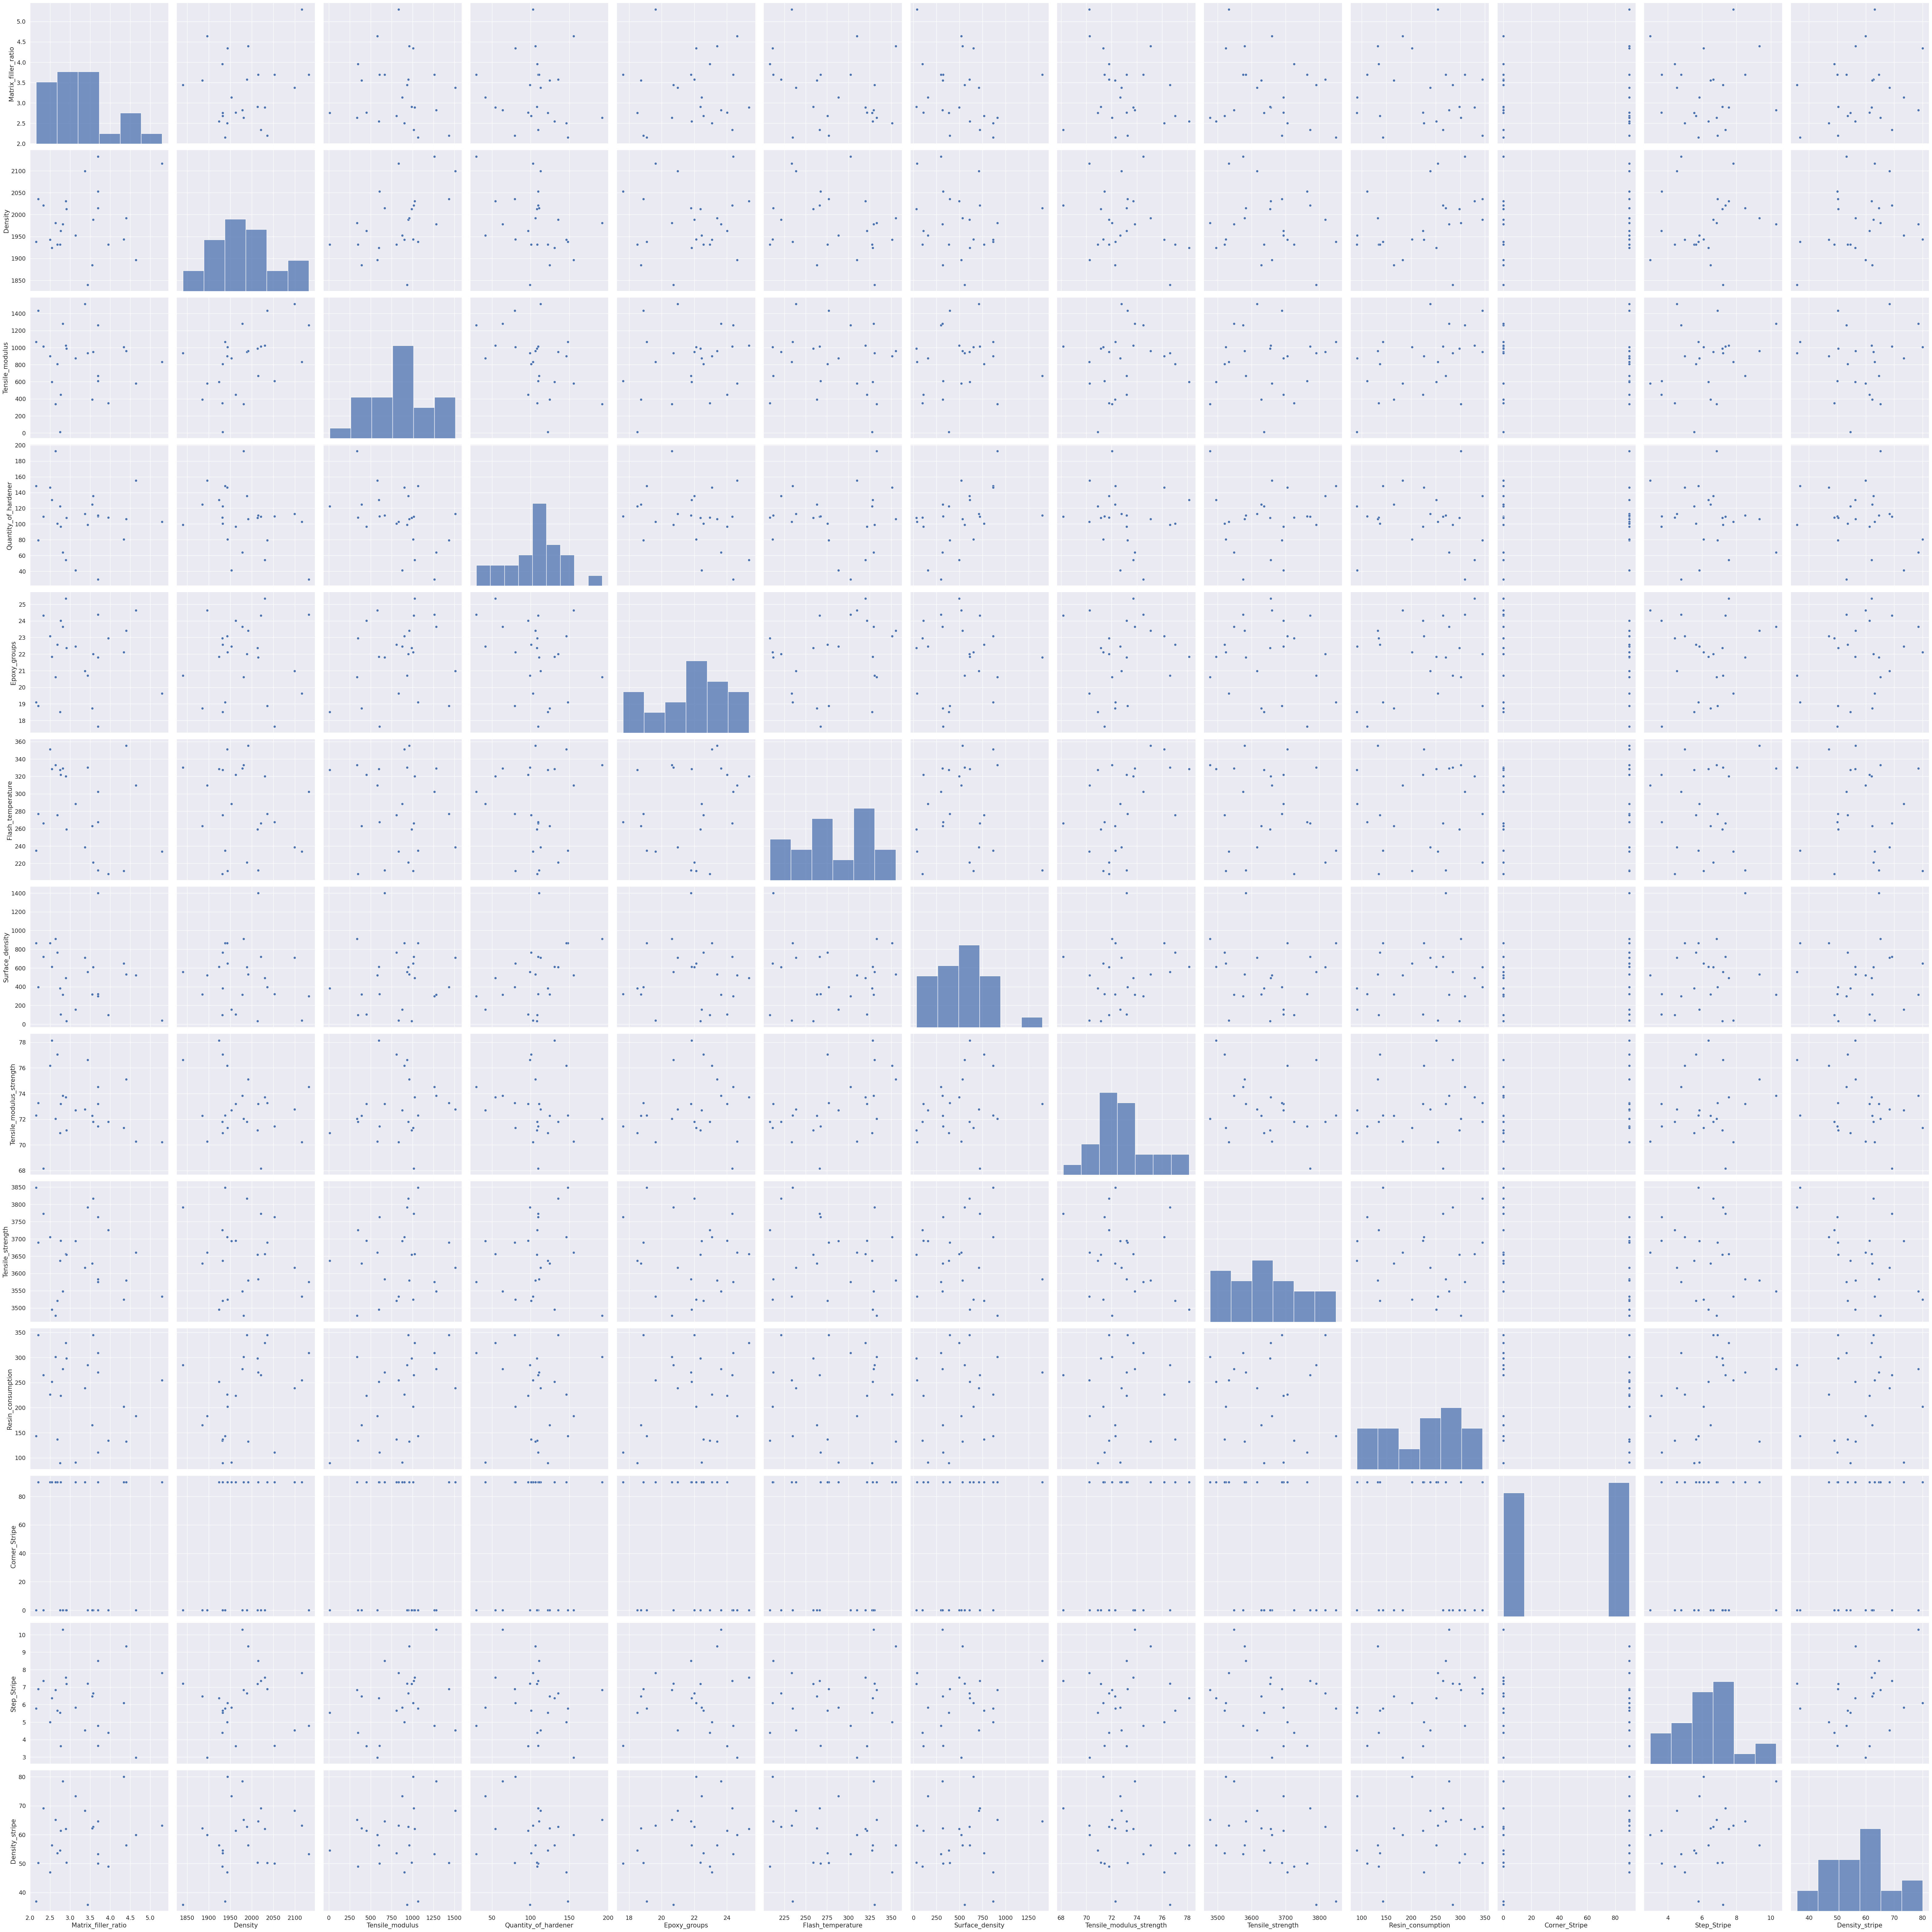

In [ ]:
#Попарные графики рассеяния точек с помощью функции sns.pairplot() для топ 25
sns.pairplot(top_mod_T25, height=5)

In [ ]:
#Разобьем Tensile_strength топ 25 на три категории по 8 значений
top_mod_T25["Tensile_strength_category"] = pd.cut(top_mod_T25["Tensile_strength"], [0, 3616.42, 3694.29, np.inf], labels=[1,2,3])

In [ ]:
top_mod_T25

,Matrix_filler_ratio,Density,Tensile_modulus,Quantity_of_hardener,Epoxy_groups,Flash_temperature,Surface_density,Tensile_modulus_strength,Tensile_strength,Resin_consumption,Corner_Stripe,Step_Stripe,Density_stripe,Group_Tensile_strength,Group_Tensile_modulus_strength,Tensile_strength_category
185,2.152055,1938.282144,1065.625743,148.104233,19.093392,234.856713,865.629036,72.299462,3848.436732,143.123640,0,5.783165,36.911051,10,4,3
387,3.578323,1988.596676,948.981345,135.707494,22.012106,221.204295,609.350655,71.801782,3817.269484,344.718381,0,6.650891,62.726164,10,4,3
172,3.441706,1839.864649,935.511792,99.079859,20.715839,330.371637,556.153263,76.632138,3791.072810,284.852950,0,7.208147,35.768811,10,9,3
106,2.334566,2020.976475,1013.513596,109.505135,24.330905,266.258622,719.870002,68.166534,3773.151949,264.835584,0,7.363599,69.172337,10,1,3
695,3.694073,2052.863693,607.307517,109.654355,17.638147,267.369398,322.090391,71.446958,3763.445179,110.801517,90,3.656530,49.994798,10,3,3
99,3.952834,1931.687894,348.354645,108.403571,22.951690,208.041941,97.545358,71.807955,3725.190760,134.392555,0,4.402248,48.959084,10,4,3
24,2.499918,1942.595777,901.519947,146.252208,23.081757,351.231874,864.725484,76.178075,3705.672523,226.222760,90,5.000000,47.000000,10,9,3
654,2.765952,1962.815063,450.162904,96.774928,24.017798,321.824505,105.594833,73.196463,3694.298044,224.098213,90,3.636983,61.322980,10,5,3
897,3.134922,1952.477882,875.447875,41.429139,22.458023,288.312124,155.638229,72.686248,3693.676531,90.546147,90,5.838643,73.345329,10,5,2
1008,2.199958,2035.926322,1432.754588,79.491398,18.888497,277.001756,394.155471,73.268805,3689.223681,345.065258,90,6.891764,50.209749,10,5,2


In [ ]:
#Можно также вычислить агрегированные значения по нескольким столбцам:
top_mod_T25.groupby("Tensile_strength_category", as_index=False).agg(  
    avg_Step_Stripe = ("Step_Stripe","mean"),
    avg_Density_stripe_qty = ("Density_stripe","mean"),
    avg_Tensile_modulus_strength_qty = ("Tensile_modulus_strength","mean"),
    avg_Matrix_filler_ratio_qty = ("Matrix_filler_ratio","mean"),
    avg_Corner_Stripe_qty = ("Corner_Stripe","mean"),
)

,Tensile_strength_category,avg_Step_Stripe,avg_Density_stripe_qty,avg_Tensile_modulus_strength_qty,avg_Matrix_filler_ratio_qty,avg_Corner_Stripe_qty
0,1,7.298747,63.432605,73.936213,3.567944,70.00
1,2,5.875649,60.122720,72.132500,3.181264,33.75
2,3,5.462695,51.481903,72.691171,3.052428,33.75


In [ ]:
#Разобьем Tensile_modulus_strength топ 25 на три категории по 8 значений
top_mod_M25["Tensile_modulus_strength_category"] = pd.cut(top_mod_M25["Tensile_modulus_strength"], [0, 80.14, 81.05, np.inf], labels=[1,2,3])

In [ ]:
top_mod_M25

,Matrix_filler_ratio,Density,Tensile_modulus,Quantity_of_hardener,Epoxy_groups,Flash_temperature,Surface_density,Tensile_modulus_strength,Tensile_strength,Resin_consumption,Corner_Stripe,Step_Stripe,Density_stripe,Group_Tensile_strength,Group_Tensile_modulus_strength,Tensile_modulus_strength_category
375,2.106888,1914.089369,963.748397,58.710809,23.813708,278.612240,793.402805,82.682051,1422.975753,283.239742,0,6.776888,49.697311,1,10,3
1000,3.109130,2019.939791,855.877168,125.654249,22.788022,323.766318,585.456532,82.525773,2715.953011,251.571333,90,4.212257,71.960542,8,10,3
505,5.452959,1918.688919,1016.975202,119.048341,23.461800,275.341538,41.129428,82.237600,2066.553692,278.510337,0,1.280057,50.323463,3,10,3
135,2.271032,1862.432065,1428.870308,125.557042,24.023624,317.571591,293.085220,81.594750,2419.520717,220.481828,0,0.310815,70.157259,5,10,3
706,2.921002,1935.790960,1027.545257,114.251686,20.919742,258.760946,358.878702,81.417126,1576.891309,152.083652,90,8.029074,59.298684,1,10,3
217,4.414416,1901.586009,1000.289288,98.244089,24.481028,288.401849,399.870134,81.203147,2371.299242,251.359279,0,2.511647,75.348275,5,10,3
221,2.051710,2161.565216,1012.659478,145.167640,24.603621,274.893657,837.480364,81.175231,2011.622551,176.817505,0,5.076483,70.979716,2,10,3
148,3.267523,2107.549113,712.148822,60.994261,27.312167,268.485007,121.565802,81.053293,3460.438212,340.016626,0,4.570892,78.547358,10,10,3
761,3.625686,2063.129132,1004.574573,89.075581,21.844375,247.156750,779.849453,80.970959,2331.536448,137.760968,90,7.409399,55.402947,4,10,2
23,2.587348,1953.274926,1136.596135,137.627420,22.344534,234.716883,555.893453,80.803222,2587.342983,246.613117,90,4.000000,70.000000,7,10,2


In [ ]:
#Можно также вычислить агрегированные значения по нескольким столбцам:
top_mod_M25.groupby("Tensile_modulus_strength_category", as_index=False).agg(  
    avg_Step_Stripe = ("Step_Stripe","mean"),
    avg_Tensile_modulus_qty = ("Tensile_modulus","mean"),
    avg_Epoxy_groups_qty = ("Epoxy_groups","mean"),
    avg_Tensile_strength_qty = ("Tensile_strength","mean"),
)

,Tensile_modulus_strength_category,avg_Step_Stripe,avg_Tensile_modulus_qty,avg_Epoxy_groups_qty,avg_Tensile_strength_qty
0,1,6.975364,763.087913,22.309330,2565.714280
1,2,6.648227,746.874946,21.594429,2305.846474
2,3,4.096014,1002.264240,23.925464,2255.656811


In [ ]:
# Колличество выбросов и аномальных значений в столбцах исходного dataset
from matplotlib.cbook import boxplot_stats
i = 1 
count = 0
for name in X_bp_nup.columns:
    outlier = boxplot_stats(X_bp_nup[name])
    print ('Количество выбросов в столбце ', name, ': ', len(outlier[0]['fliers']))
    count += len(outlier[0]['fliers'])
    i += 1
print(f'Общее число ошибок: {count}')

Количество выбросов в столбце  Matrix_filler_ratio :  0
Количество выбросов в столбце  Density :  0
Количество выбросов в столбце  Tensile_modulus :  0
Количество выбросов в столбце  Quantity_of_hardener :  0
Количество выбросов в столбце  Epoxy_groups :  0
Количество выбросов в столбце  Flash_temperature :  0
Количество выбросов в столбце  Surface_density :  0
Количество выбросов в столбце  Tensile_modulus_strength :  0
Количество выбросов в столбце  Tensile_strength :  0
Количество выбросов в столбце  Resin_consumption :  0
Количество выбросов в столбце  Corner_Stripe :  0
Количество выбросов в столбце  Step_Stripe :  0
Количество выбросов в столбце  Density_stripe :  0
Количество выбросов в столбце  Tensile_strength_category :  0
Количество выбросов в столбце  Tensile_modulus_strength_category :  0
Общее число ошибок: 0


In [ ]:
X_bp_nup.columns.tolist()

['Matrix_filler_ratio',
 'Density',
 'Tensile_modulus',
 'Quantity_of_hardener',
 'Epoxy_groups',
 'Flash_temperature',
 'Surface_density',
 'Tensile_modulus_strength',
 'Tensile_strength',
 'Resin_consumption',
 'Corner_Stripe',
 'Step_Stripe',
 'Density_stripe',
 'Tensile_strength_category',
 'Tensile_modulus_strength_category']

In [ ]:
list_col = ['Matrix_filler_ratio',
 'Density',
 'Tensile_modulus',
 'Quantity_of_hardener',
 'Epoxy_groups',
 'Flash_temperature',
 'Surface_density',
 'Tensile_modulus_strength',
 'Tensile_strength',
 'Resin_consumption',
 'Corner_Stripe',
 'Step_Stripe',
 'Density_stripe']
for i in list_col:
    q75, q25 = np.percentile(X_bp_nup.loc[:,i], [75,25])
    intr_qr = q75 - q25
    max = q75 + (1.5 * intr_qr)
    min = q25 - (1.5 * intr_qr)
    X_bp_nup.loc[X_bp_nup[i] < min, i] = np.nan
    X_bp_nup.loc[X_bp_nup[i] > max, i] = np.nan
X_bp_nup.dropna(inplace = True)
X_bp_nup.shape

(936, 15)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler = StandardScaler()
df_std = std_scaler.fit_transform(np.array(X_bp_nup))

In [ ]:
df_std_name = pd.DataFrame(data=df_std, columns=X_bp_nup.columns)
df_std_name.describe().T

,count,mean,std,min,25%,50%,75%,max
Matrix_filler_ratio,936.0,-3.985416e-16,1.000535,-2.662564,-0.675917,-0.023457,0.695189,2.673947
Density,936.0,-1.040004e-15,1.000535,-2.678494,-0.714937,0.045471,0.651668,2.649773
Tensile_modulus,936.0,1.480297e-16,1.000535,-2.239686,-0.729517,0.001489,0.670165,2.773444
Quantity_of_hardener,936.0,-4.934325e-17,1.000535,-2.673520,-0.680609,0.007288,0.706247,2.624101
Epoxy_groups,936.0,-8.264994e-16,1.000535,-2.721073,-0.684125,-0.010160,0.732284,2.818386
Flash_temperature,936.0,2.827748e-16,1.000535,-2.708660,-0.681975,-0.000414,0.684390,2.540085
Surface_density,936.0,1.537232e-16,1.000535,-1.722572,-0.774851,-0.090207,0.760272,2.886532
Tensile_modulus_strength,936.0,-4.531987e-15,1.000535,-2.553495,-0.677361,-0.015119,0.660679,2.672150
Tensile_strength,936.0,7.591269e-16,1.000535,-2.625366,-0.691456,-0.020555,0.620548,2.670853
Resin_consumption,936.0,-1.622634e-16,1.000535,-2.663276,-0.659631,0.013415,0.671035,2.447193


In [ ]:
#Запись csv-файла
df_std_name.to_csv('df_std_name1.csv', index = False)

In [ ]:
X_bp_nup["Matrix_filler_ratio_category"] = pd.cut(X_bp_nup["Matrix_filler_ratio"], [0, 2.5, 4, np.inf], labels=[1,2,3])

In [ ]:
X_bp_nup

,Matrix_filler_ratio,Density,Tensile_modulus,Quantity_of_hardener,Epoxy_groups,Flash_temperature,Surface_density,Tensile_modulus_strength,Tensile_strength,Resin_consumption,Corner_Stripe,Step_Stripe,Density_stripe,Tensile_strength_category,Tensile_modulus_strength_category,Matrix_filler_ratio_category
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000,3,1,1
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000,3,1,1
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000,3,1,1
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000,3,1,1
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90,9.076380,47.019770,1,2,1
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90,10.565614,53.750790,1,2,2
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90,4.161154,67.629684,2,2,2
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90,6.313201,58.261074,1,2,2


In [ ]:
#X_bp_nup.describe().T
X_bp_nup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Matrix_filler_ratio                1023 non-null   float64 
 1   Density                            1023 non-null   float64 
 2   Tensile_modulus                    1023 non-null   float64 
 3   Quantity_of_hardener               1023 non-null   float64 
 4   Epoxy_groups                       1023 non-null   float64 
 5   Flash_temperature                  1023 non-null   float64 
 6   Surface_density                    1023 non-null   float64 
 7   Tensile_modulus_strength           1023 non-null   float64 
 8   Tensile_strength                   1023 non-null   float64 
 9   Resin_consumption                  1023 non-null   float64 
 10  Corner_Stripe                      1023 non-null   int64   
 11  Step_Stripe                        1023 non

In [ ]:
#Агрегированные значения
X_bp_nup.groupby("Matrix_filler_ratio_category", as_index=False).agg(  
    avg_Step_Stripe = ("Step_Stripe","mean"),
    avg_Density_stripe_qty = ("Density_stripe","mean"),
    avg_Tensile_modulus_strength_qty = ("Tensile_modulus_strength","mean"),
    avg_Tensile_strength_qty = ("Tensile_strength","mean"),
)

,Matrix_filler_ratio_category,avg_Step_Stripe,avg_Density_stripe_qty,avg_Tensile_modulus_strength_qty,avg_Tensile_strength_qty
0,1,6.853230,56.940501,73.452544,2437.079637
1,2,6.851649,57.273053,73.214469,2484.593157
2,3,7.230811,57.164518,73.524328,2463.846405


In [ ]:
X_bp['Flash_temperature'].value_counts()
#300.00 встречается 12раз, 284.61 встречается 10раз. 
#Повторяющиеся значения относятся к строкам с 0 по 22.

300.000000    12
284.615385    10
278.457686     1
382.759808     1
236.284743     1
              ..
248.849293     1
237.911236     1
364.872558     1
273.857159     1
300.952708     1
Name: Flash_temperature, Length: 1003, dtype: int64

In [ ]:
X_bp['Tensile_modulus_strength'].value_counts()
#70.00 встречается 9раз, 73.33 встречается 5раз и т.д. 
#Повторяющиеся значения относятся к строкам с 0 по 22.

70.000000    9
73.333333    5
78.000000    5
75.000000    4
74.042708    1
            ..
71.758909    1
76.398875    1
66.522175    1
72.124020    1
74.309704    1
Name: Tensile_modulus_strength, Length: 1004, dtype: int64

In [ ]:
X_bp['Tensile_strength'].value_counts()
#Для 300 градусов самое большое количество образцов

3000.000000    9
2455.555556    5
2000.000000    5
1800.000000    4
2071.715856    1
              ..
2167.533030    1
2300.777919    1
2363.621230    1
2038.469587    1
2856.328932    1
Name: Tensile_strength, Length: 1004, dtype: int64

In [ ]:
#X_bp['Потребление смолы, г/м2'].value_counts()
#Для 300 градусов самое большое количество образцов

220.000000    14
300.000000     5
120.000000     4
197.126067     1
226.994460     1
              ..
250.822178     1
242.416875     1
213.675599     1
212.307711     1
194.754342     1
Name: Потребление смолы, г/м2, Length: 1003, dtype: int64

In [ ]:
#X_bp['Содержание эпоксидных групп,%_2'].value_counts()
#21.25 встречается 12раз, 22.26 встречается 9раз. 
#Повторяющиеся значения относятся к строкам с 0 по 22.

21.250000    12
22.267857     9
25.576630     1
25.050848     1
23.276208     1
             ..
21.132573     1
23.961233     1
21.043501     1
20.646284     1
27.474763     1
Name: Содержание эпоксидных групп,%_2, Length: 1004, dtype: int64

In [ ]:
X_bp['Quantity_of_hardener'].value_counts()
#129.00 встречается 12раз, 111.86 встречается 8раз. 
#Повторяющиеся значения относятся к строкам с 0 по 22.

129.000000    12
111.860000     8
30.000000      1
116.396208     1
137.983837     1
              ..
109.246571     1
62.743272      1
119.924425     1
122.273222     1
129.183416     1
Name: Quantity_of_hardener, Length: 1005, dtype: int64

In [ ]:
#X_bp['Поверхностная плотность, г/м2'].value_counts()
#Для 300 градусов самое большое количество образцов

In [ ]:
#X_bp['модуль упругости, ГПа'].value_counts()
#Для 300 градусов самое большое количество образцов

In [ ]:
#X_bp['Плотность, кг/м3'].value_counts()
#Для 300 градусов самое большое количество образцов

In [ ]:
X_bp['Matrix_filler_ratio'].value_counts()
#1.85 встречается 4раза, 3.53 встречается 2раза и т.д. 
#Повторяющиеся значения относятся к строкам с 0 по 22.

1.857143    4
3.532338    2
1.598174    2
2.877358    2
2.919678    2
           ..
4.275325    1
2.908835    1
2.661267    1
3.324730    1
3.808020    1
Name: Matrix_filler_ratio, Length: 1014, dtype: int64